<a href="https://colab.research.google.com/github/mipxman/ML-in-Astronomy/blob/main/CosmicWeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Cosmic Web as a Complex Network
Model the large-scale structure of the universe (cosmic web) as a network to study its topology, community structure, and evolution.



**Install prerequisties python packages**

In [1]:
pip install astropy astroquery pandas networkx scipy matplotlib python-louvain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 14.1 MB/s eta 0:00:00


 Step 1: Generate mock galaxy positions (RA, Dec, redshift)

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from community import community_louvain  # Louvain method for community detection

# Step 1: Generate mock galaxy positions (RA, Dec, redshift)
def generate_mock_data(n_galaxies=500):
    ra = np.random.uniform(0, 360, n_galaxies)  # Right Ascension (degrees)
    dec = np.random.uniform(-90, 90, n_galaxies)  # Declination (degrees)
    redshift = np.random.uniform(0, 1, n_galaxies)  # Mock redshift (distance proxy)
    return np.vstack((ra, dec, redshift)).T

galaxy_positions = generate_mock_data()

Step 2: Construct Network using Friends-of-Friends (FoF) algorithm

In [3]:
# Step 2: Construct Network using Friends-of-Friends (FoF) algorithm
def construct_network(positions, linking_length=5):
    G = nx.Graph()
    tree = cKDTree(positions)  # k-d tree for fast neighbor search
    for i, pos in enumerate(positions):
        indices = tree.query_ball_point(pos, linking_length)  # Find nearby galaxies
        for j in indices:
            if i != j:
                G.add_edge(i, j)
    return G

G = construct_network(galaxy_positions)

Step 3: Analyze network properties

In [4]:

# Step 3: Analyze network properties
def analyze_network(G):
    degrees = [d for n, d in G.degree()]
    clustering_coeffs = nx.clustering(G)
    avg_clustering = np.mean(list(clustering_coeffs.values()))
    print(f"Network Analysis:\nNodes: {G.number_of_nodes()}\nEdges: {G.number_of_edges()}\nAvg Degree: {np.mean(degrees):.2f}\nAvg Clustering: {avg_clustering:.2f}")
    return degrees, clustering_coeffs

degrees, clustering_coeffs = analyze_network(G)


Network Analysis:
Nodes: 226
Edges: 162
Avg Degree: 1.43
Avg Clustering: 0.20


Step 4, 5 : Visualize the Network

Louvain is used to identify large-scale structures (clusters and filaments) in the cosmic web.

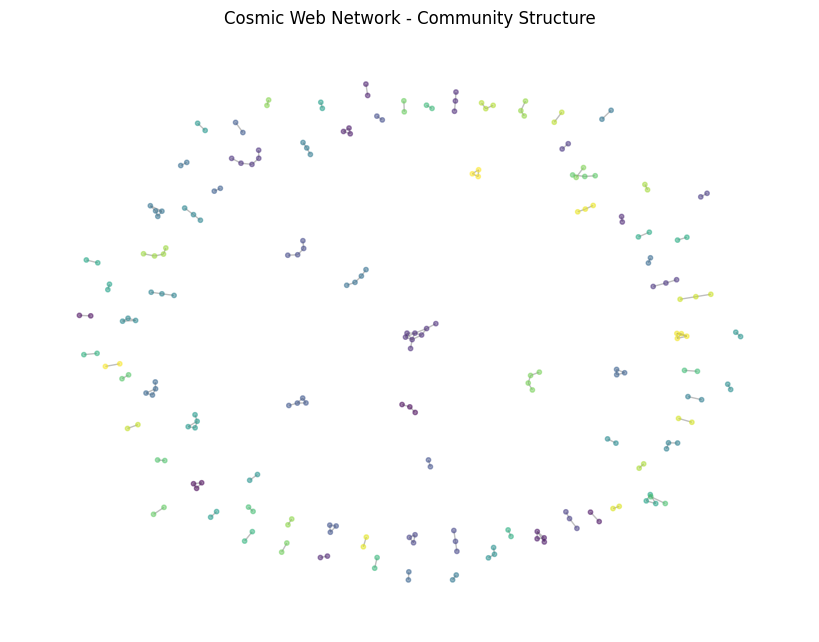

In [5]:
# Step 4: Community Detection using Louvain method
communities = community_louvain.best_partition(G)

# Step 5: Visualize the Network
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=10, node_color=list(communities.values()), cmap=plt.cm.viridis, edge_color='gray', alpha=0.5)
plt.title("Cosmic Web Network - Community Structure")
plt.show()


**Example B**

change the `redshift = np.random.uniform(0, 1, n_galaxies)` to `redshift = np.random.uniform(0, 2, n_galaxies)`

In [6]:
# Step 1: Generate mock galaxy positions (RA, Dec, redshift)
def generate_mock_data(n_galaxies=1000):
    ra = np.random.uniform(0, 360, n_galaxies)  # Right Ascension (degrees)
    dec = np.random.uniform(-90, 90, n_galaxies)  # Declination (degrees)
    redshift = np.random.uniform(0, 2, n_galaxies)  # Increased redshift range for larger cosmic volume
    return np.vstack((ra, dec, redshift)).T

galaxy_positions = generate_mock_data()

Construct FOF Network by changing the `linking_length=5 ` to `7`



In [7]:
def construct_network(positions, linking_length=7):  # Increased linking length for better connectivity
    G = nx.Graph()
    tree = cKDTree(positions)  # k-d tree for fast neighbor search
    for i, pos in enumerate(positions):
        indices = tree.query_ball_point(pos, linking_length)  # Find nearby galaxies
        for j in indices:
            if i != j:
                G.add_edge(i, j)
    return G

G = construct_network(galaxy_positions)
# Step 3: Analyze network properties
def analyze_network(G):
    degrees = [d for n, d in G.degree()]
    clustering_coeffs = nx.clustering(G)
    avg_clustering = np.mean(list(clustering_coeffs.values()))
    print(f"Network Analysis:\nNodes: {G.number_of_nodes()}\nEdges: {G.number_of_edges()}\nAvg Degree: {np.mean(degrees):.2f}\nAvg Clustering: {avg_clustering:.2f}")
    return degrees, clustering_coeffs

degrees, clustering_coeffs = analyze_network(G)

Network Analysis:
Nodes: 888
Edges: 1131
Avg Degree: 2.55
Avg Clustering: 0.42


Visualization :

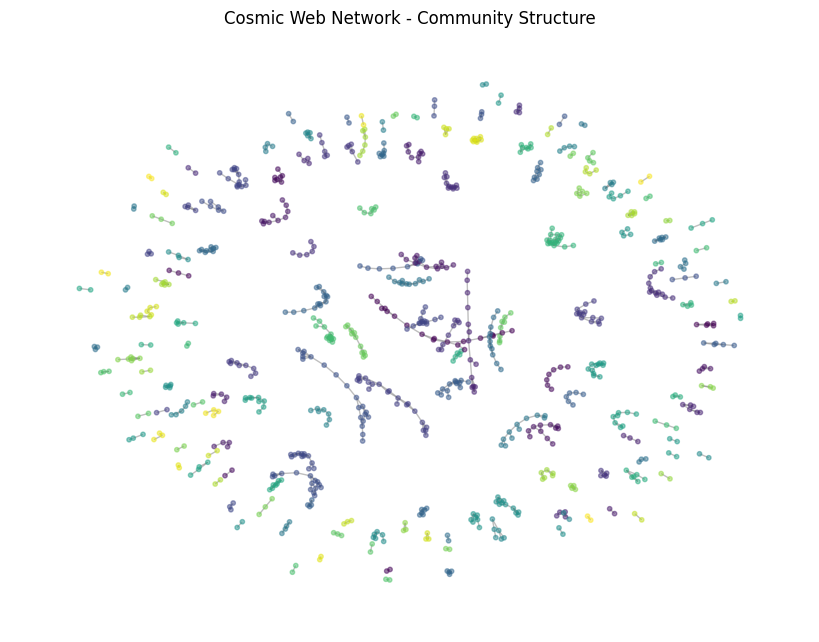

In [8]:


communities = community_louvain.best_partition(G)

# Step 5: Visualize the Network
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=10, node_color=list(communities.values()), cmap=plt.cm.viridis, edge_color='gray', alpha=0.5)
plt.title("Cosmic Web Network - Community Structure")
plt.show()


Install infomap, for using the alternate method of Louvain method.

In [9]:
pip install infomap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.8/264.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.8.0-cp311-cp311-linux_x86_64.whl size=7698804 sha256=7b9fc96bfb225727b94dde75d6dc6fd8bdae52830fcb2c99950c1746ba6aa353
  Stored in directory: /root/.cache/pip/wheels/f2/07/de/ee649642ec15485c0eaf89c9f06eb4f19a9b45e744e6808a8d
Successfully built infomap


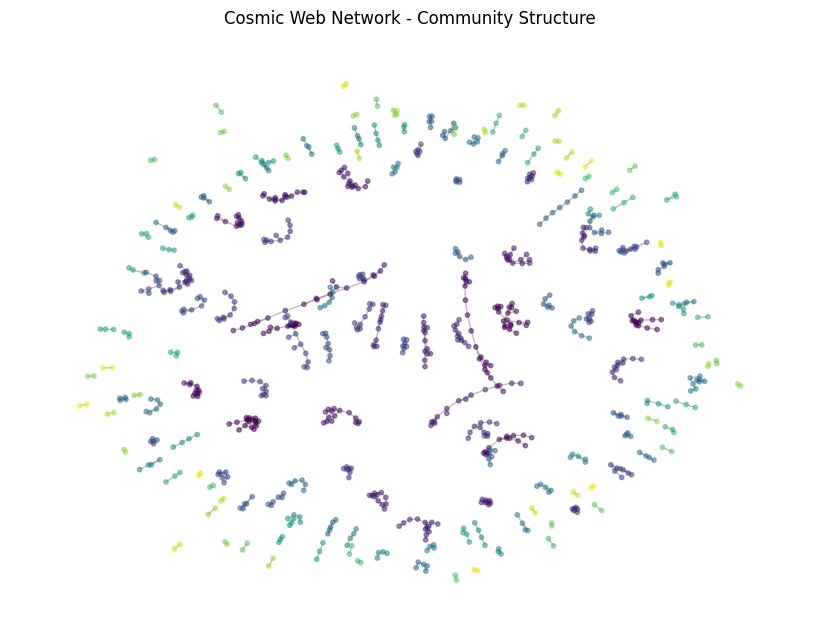

In [10]:
# Step 4: Community Detection using Infomap (alternative to Louvain)
try:
    import infomap
    im = infomap.Infomap()
    for node in G.nodes():
        im.add_node(node)
    for edge in G.edges():
        im.add_link(*edge)
    im.run()
    communities = {node: im.get_modules()[node] for node in G.nodes()}
except ImportError:
    print("Infomap not installed. Using Louvain instead.")
    communities = community_louvain.best_partition(G)

# Step 5: Visualize the Network
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=10, node_color=list(communities.values()), cmap=plt.cm.viridis, edge_color='gray', alpha=0.5)
plt.title("Cosmic Web Network - Community Structure")
plt.show()


## Example C - Comapre with SDSS data

this code sends query to  the SDSS database for real galaxy positions (RA, Dec, redshift).

Network Analysis:
Nodes: 464
Edges: 4356
Avg Degree: 18.78
Avg Clustering: 0.75


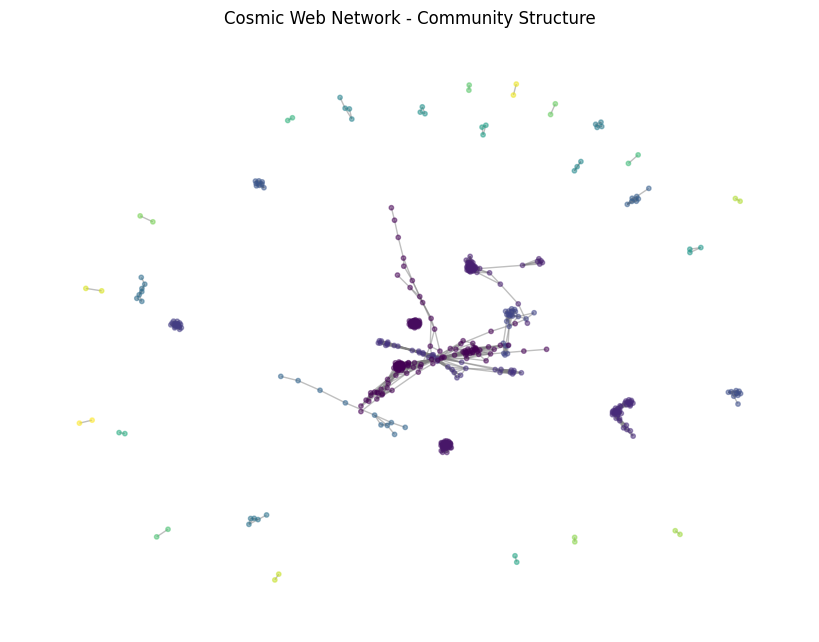

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from community import community_louvain
from astroquery.sdss import SDSS
from astropy.table import Table
from scipy.linalg import eigh

# Query SDSS for real galaxy positions
def query_sdss(n_galaxies=500):
    query = """
        SELECT TOP {}
            ra, dec, z
        FROM SpecObj
        WHERE class = 'GALAXY' AND z BETWEEN 0 AND 2
    """.format(n_galaxies)
    result = SDSS.query_sql(query)
    return np.array([result['ra'], result['dec'], result['z']]).T

galaxy_positions = query_sdss()

# Construct Network using Friends-of-Friends (FoF) algorithm
def construct_network(positions, linking_length=7):
    G = nx.Graph()
    tree = cKDTree(positions)  # k-d tree for fast neighbor search
    for i, pos in enumerate(positions):
        indices = tree.query_ball_point(pos, linking_length)  # Find nearby galaxies
        for j in indices:
            if i != j:
                G.add_edge(i, j)
    return G

G = construct_network(galaxy_positions)

# Analyze network properties
def analyze_network(G):
    degrees = [d for n, d in G.degree()]
    clustering_coeffs = nx.clustering(G)
    avg_clustering = np.mean(list(clustering_coeffs.values()))
    print(f"Network Analysis:\nNodes: {G.number_of_nodes()}\nEdges: {G.number_of_edges()}\nAvg Degree: {np.mean(degrees):.2f}\nAvg Clustering: {avg_clustering:.2f}")
    return degrees, clustering_coeffs

degrees, clustering_coeffs = analyze_network(G)

# Community Detection using Infomap
try:
    import infomap
    im = infomap.Infomap()
    for node in G.nodes():
        im.add_node(node)
    for edge in G.edges():
        im.add_link(*edge)
    im.run()
    communities = {node: im.get_modules()[node] for node in G.nodes()}
except ImportError:
    print("Infomap not installed. Using Louvain instead.")
    communities = community_louvain.best_partition(G)

# Step 5: Compute Spectral Properties
def spectral_analysis(G):
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues, _ = eigh(L)
    return eigenvalues

eigenvalues = spectral_analysis(G)


plt.figure(figsize=(8, 6))
nx.draw(G, node_size=10, node_color=list(communities.values()), cmap=plt.cm.viridis, edge_color='gray', alpha=0.5)
plt.title("Cosmic Web Network - Community Structure")
plt.show()


Visualize the Eigenvalue Distribution

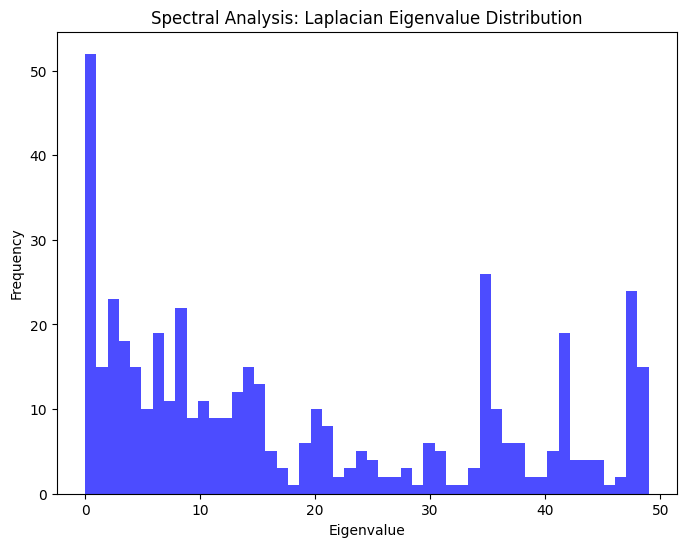

In [12]:

plt.figure(figsize=(8, 6))
plt.hist(eigenvalues, bins=50, color='blue', alpha=0.7)
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")
plt.title("Spectral Analysis: Laplacian Eigenvalue Distribution")
plt.show()


**Effects of Changing** `n_galaxies`

1.   Increasing `n_galaxies`(e.g.,` n_galaxies = 1000` or more)
  
  *   Generates a more detailed and dense cosmic web.
  *   Increases computational complexity and processing time.
  *   Enhances clustering effects and community structures.


2.   Decreasing `n_galaxies` (e.g., `n_galaxies = 200`)
  * Produces a lower-resolution cosmic web with fewer connections.
  * Reduces computational load.
  * Might lose some structural features of large-scale cosmic web networks.

**Adjacency Matrix of Cosmic Web**

The adjacency matrix of the cosmic web represents the connectivity between galaxies, where each entry $A_{ij}$
  denotes the presence or absence of a direct link between two nodes. The resulting matrix visualization reveals distinct block-like structures along the diagonal, indicating highly interconnected communities, likely corresponding to galaxy clusters and filaments. The sparse background suggests a network with weakly connected or isolated galaxies, reinforcing the notion that the cosmic web is not fully connected. The prominence of strong diagonal elements highlights the dominance of local interactions, where galaxies are more likely to be linked to their nearest neighbors.



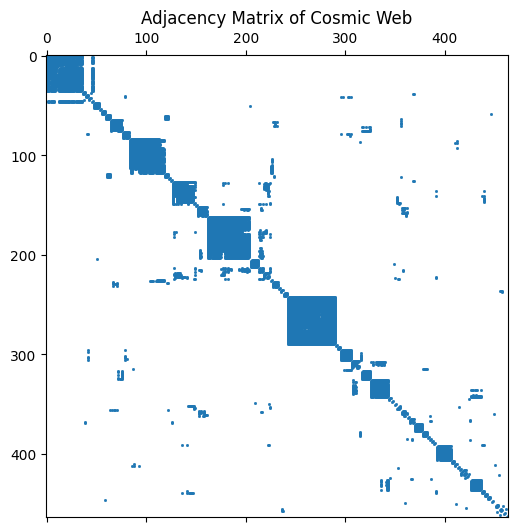

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp

#Adjacency Matrix
A = nx.to_scipy_sparse_array(G)

# Plot adjacency matrix
plt.figure(figsize=(8, 6))
plt.spy(A, markersize=1)
plt.title("Adjacency Matrix of Cosmic Web")
plt.show()
